# Jupyter notebook sample

## Parameters

In [7]:
filename = "Dataset/50/C101.txt"
#filename = "Dataset/200/C1_210.TXT"

vehicle_capacity = 30

## Fetch and parse data

In [8]:
with open(filename) as file:
    lines = file.readlines()

lines = lines[10:-1]

for i in range(len(lines)):
    lines[i] = lines[i].strip().split()
    lines[i] = list(map(int, lines[i]))

lines

[[1, 45, 68, 10, 912, 967, 90],
 [2, 45, 70, 30, 825, 870, 90],
 [3, 42, 66, 10, 65, 146, 90],
 [4, 42, 68, 10, 727, 782, 90],
 [5, 42, 65, 10, 15, 67, 90],
 [6, 40, 69, 20, 621, 702, 90],
 [7, 40, 66, 20, 170, 225, 90],
 [8, 38, 68, 20, 255, 324, 90],
 [9, 38, 70, 10, 534, 605, 90],
 [10, 35, 66, 10, 357, 410, 90],
 [11, 35, 69, 10, 448, 505, 90],
 [12, 25, 85, 20, 652, 721, 90],
 [13, 22, 75, 30, 30, 92, 90],
 [14, 22, 85, 10, 567, 620, 90],
 [15, 20, 80, 40, 384, 429, 90],
 [16, 20, 85, 40, 475, 528, 90],
 [17, 18, 75, 20, 99, 148, 90],
 [18, 15, 75, 20, 179, 254, 90],
 [19, 15, 80, 10, 278, 345, 90],
 [20, 30, 50, 10, 10, 73, 90],
 [21, 30, 52, 20, 914, 965, 90],
 [22, 28, 52, 20, 812, 883, 90],
 [23, 28, 55, 10, 732, 777, 90],
 [24, 25, 50, 10, 65, 144, 90],
 [25, 25, 52, 40, 169, 224, 90],
 [26, 25, 55, 10, 622, 701, 90],
 [27, 23, 52, 10, 261, 316, 90],
 [28, 23, 55, 20, 546, 593, 90],
 [29, 20, 50, 10, 358, 405, 90],
 [30, 20, 55, 10, 449, 504, 90],
 [31, 10, 35, 20, 200, 237, 

## Create dataframe

In [9]:
import pandas as pd

locations = pd.DataFrame(lines, columns=["id", "x", "y", "demand", "ready_time", "due_date", "service"])

locations

,id,x,y,demand,ready_time,due_date,service
0,1,45,68,10,912,967,90
1,2,45,70,30,825,870,90
2,3,42,66,10,65,146,90
3,4,42,68,10,727,782,90
4,5,42,65,10,15,67,90
5,6,40,69,20,621,702,90
6,7,40,66,20,170,225,90
7,8,38,68,20,255,324,90
8,9,38,70,10,534,605,90
9,10,35,66,10,357,410,90


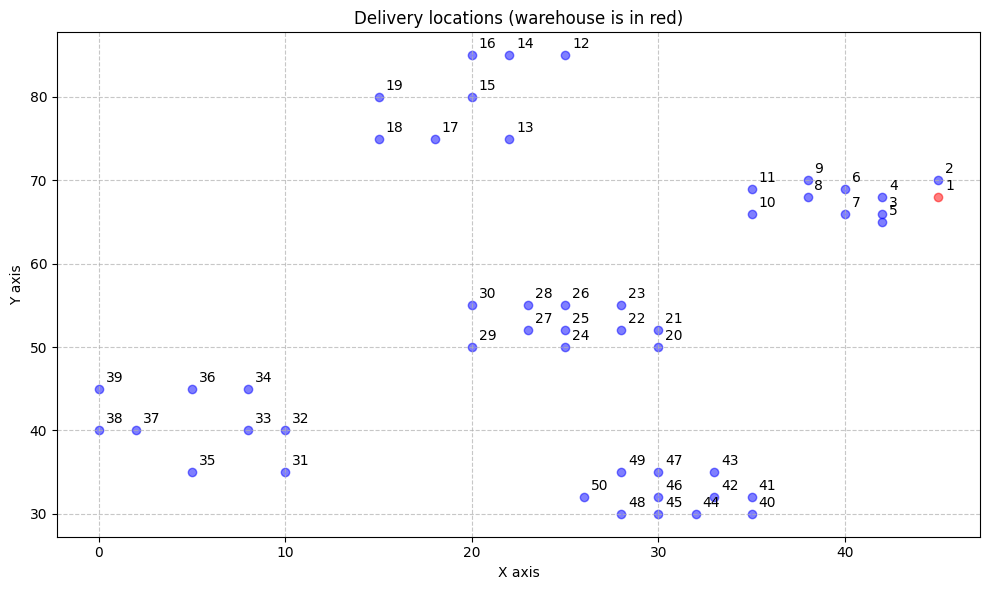

In [10]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Draw warehouse
plt.scatter(locations['x'][0], locations['y'][0], c='red', alpha=0.5)

# Draw customers
plt.scatter(locations['x'][1:], locations['y'][1:], c='blue', alpha=0.5)

# Add labels for each point
for i, row in locations.iterrows():
    plt.annotate(row['id'],
                 (row['x'], row['y']),
                 xytext=(5, 5),  # 5 points offset
                 textcoords='offset points',
                 fontsize=10,
                 ha='left')  # horizontal alignment



# Customize the plot
plt.title('Delivery locations (warehouse is in red)')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


## Turn into location objects

In [11]:
from Location import Location

locations = [Location(**record) for record in locations.to_dict('records')]

locations

[Location(id=1, x=45, y=68, demand=10, ready_time=912, due_date=967, service=90),
 Location(id=2, x=45, y=70, demand=30, ready_time=825, due_date=870, service=90),
 Location(id=3, x=42, y=66, demand=10, ready_time=65, due_date=146, service=90),
 Location(id=4, x=42, y=68, demand=10, ready_time=727, due_date=782, service=90),
 Location(id=5, x=42, y=65, demand=10, ready_time=15, due_date=67, service=90),
 Location(id=6, x=40, y=69, demand=20, ready_time=621, due_date=702, service=90),
 Location(id=7, x=40, y=66, demand=20, ready_time=170, due_date=225, service=90),
 Location(id=8, x=38, y=68, demand=20, ready_time=255, due_date=324, service=90),
 Location(id=9, x=38, y=70, demand=10, ready_time=534, due_date=605, service=90),
 Location(id=10, x=35, y=66, demand=10, ready_time=357, due_date=410, service=90),
 Location(id=11, x=35, y=69, demand=10, ready_time=448, due_date=505, service=90),
 Location(id=12, x=25, y=85, demand=20, ready_time=652, due_date=721, service=90),
 Location(id=13,

## Compute VRP solution using nearest neighbor

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Vehicle Route - Total Distance: 261.6736306545833'}, xlabel='X Coordinate', ylabel='Y Coordinate'>)

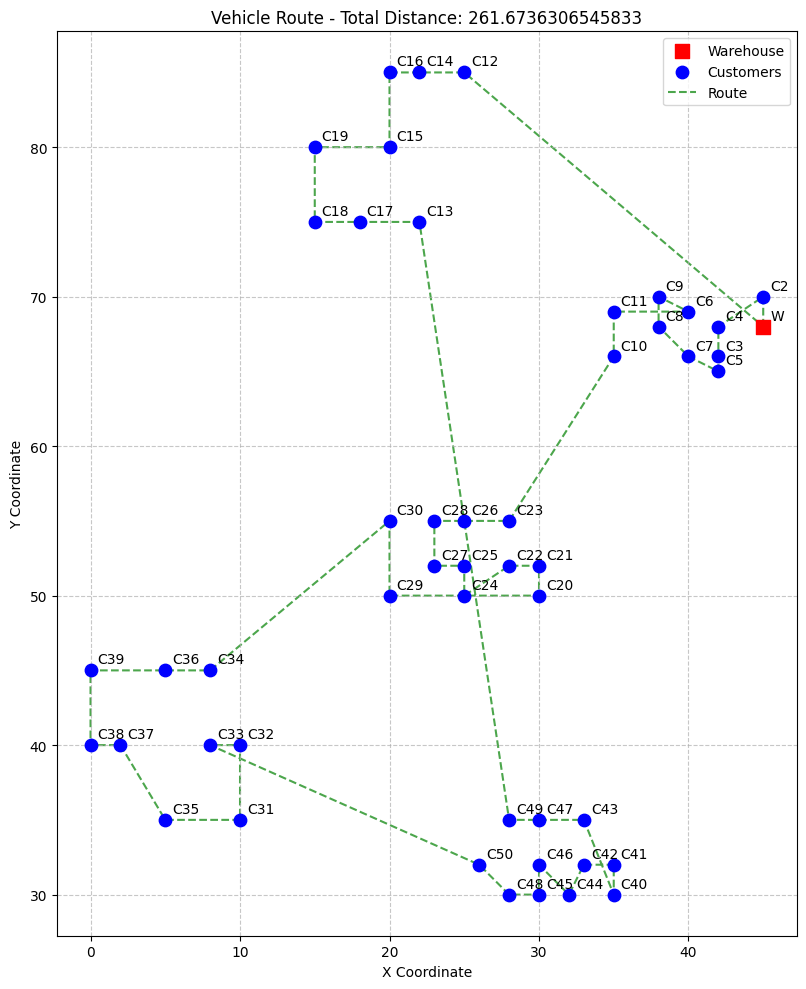

In [12]:
from Route import Route

route = Route(warehouse=locations[0], customers=[])

current = locations.pop(0)

while locations:
    current, locations = current.find_closest(locations)
    route.customers.append(current)

route.plot(figsize=(10, 10))